<h1 ><center><b>SMS Spam or Ham Classification project</b></center></h1>

## Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)

In [10]:
# import os
# os.getcwd()

#os.chdir('/Users/swetha/Desktop/DS/Stats & ML/ML projects/my projects/spam.csv', encoding='latin-1')

df = pd.read_csv('/Users/swetha/Desktop/DS/Stats & ML/ML projects/my projects/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

## Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# drop the last three columns

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.target.value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

LC = LabelEncoder()

df['target'] = LC.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
## Missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
## duplicate values

df.duplicated().sum()

403

In [26]:
## remove duplicates

df = df.drop_duplicates(keep = 'first')

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(5169, 2)

## EDA

In [29]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [30]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

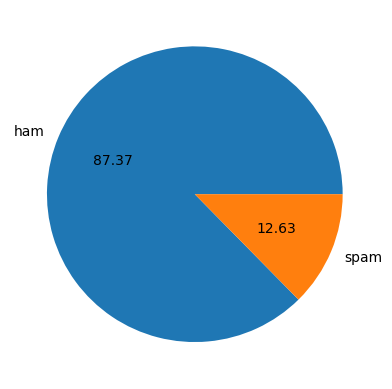

In [32]:
plt.pie(df.target.value_counts(), labels = ['ham', 'spam'], autopct ="%0.2f")
plt.show()

In [33]:
## 87.37% of messages are ham and balance 12.6% are spam. This is highly imbalanced dataset

In [109]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/swetha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/swetha/nltk_data...


True

In [41]:
# fetching no of characters
df['no_characters']= df['text'].apply(len)

In [40]:
df.head()

,target,text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
# fetching no of words
df['no_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [44]:
df.head()

,target,text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
# fetching no of sentences
df['no_sentences']= df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [46]:
df.head()

,target,text,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df[['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
## Analysing the ham messages

df[df['target'] == 0][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
## Analysing the spam messages

df[df['target'] == 1][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_characters', ylabel='Count'>

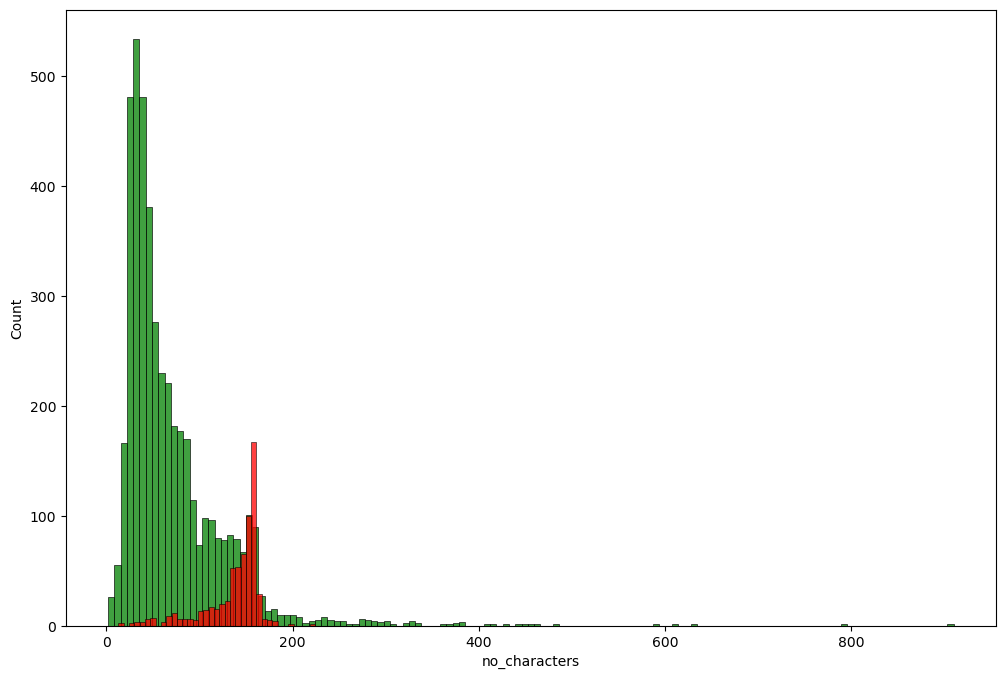

In [57]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['no_characters'], color = 'green')
sns.histplot(df[df['target'] == 1]['no_characters'], color = 'red')

In [58]:
# In spam messages, no of characters are more when compared to ham.

<Axes: xlabel='no_words', ylabel='Count'>

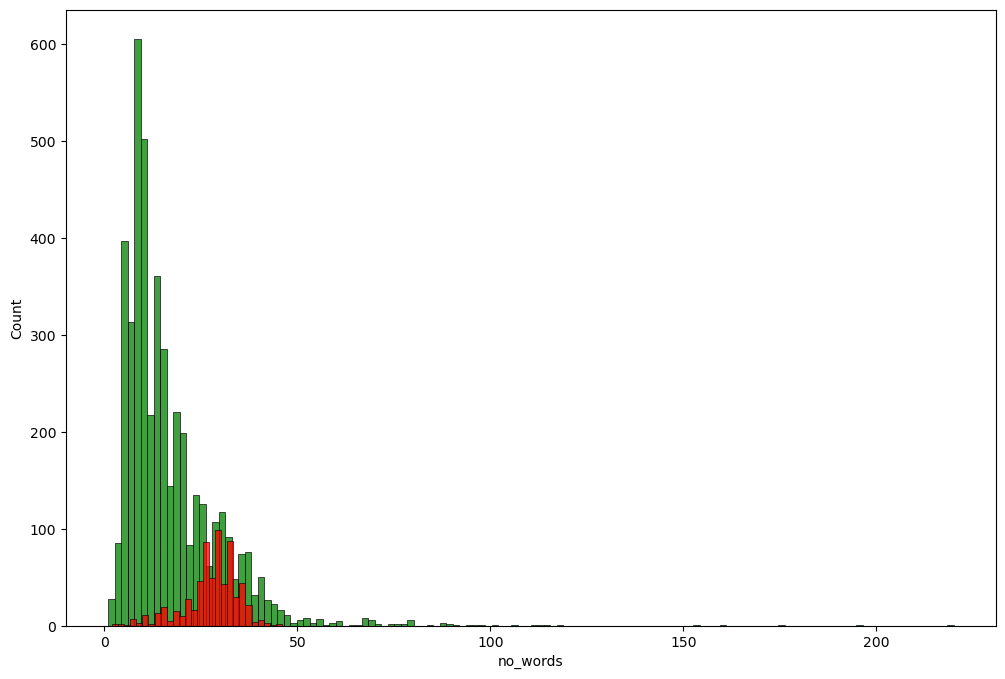

In [59]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['no_words'], color = 'green')
sns.histplot(df[df['target'] == 1]['no_words'], color = 'red')

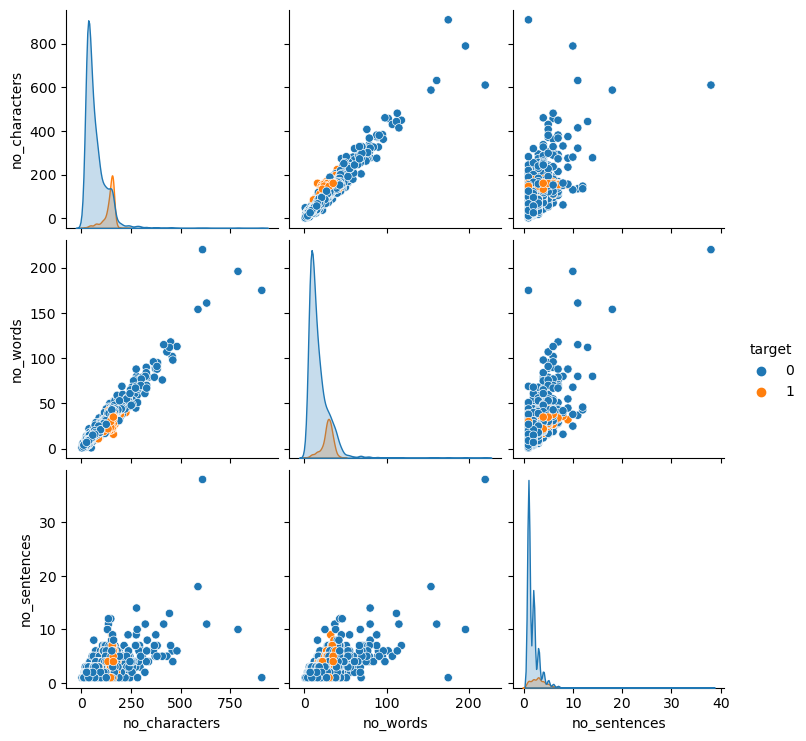

In [60]:
sns.pairplot(df, hue = 'target')

In [68]:
#sns.heatmap(df.corr(), annot = True)

## Data Preprocessing

### Steps we follow in text data
#### 1. Cleaning text
#### 2. Tokenization
#### 3. Removing stop words
#### 4. Stemming/Lemmatization

## Cleaning the Text

In [104]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swetha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# Lets see the first 5 texts before cleaning
print(*df['text'][:5], sep = "\n")

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [96]:
# defining a function to clean the text
def clean(text):
    sms = re.sub('[^a-zA-Z]', ' ', text) # replacing all non alphabetic characterstic with a space
    sms = sms.lower() # converting it to lower case
    sms = sms.split()
    sms = ' '.join(sms)
    return sms
    
    
df['clean_text'] = df['text'].apply(clean) 

print("The first 5 texts after cleaning :", *df['clean_text'][:5], sep = "\n")

The first 5 texts after cleaning :
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


## Tokenization

In [103]:
df['Tokenize_text'] = df.apply(lambda row : nltk.word_tokenize(row['clean_text']), axis = 1)

print("Text after tokenization:", *df['Tokenize_text'][:5], sep ='\n')

Text after tokenization:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


### Removing StopWords

In [102]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df['nonstop_words'] = df['Tokenize_text'].apply(remove_stopwords)
print("Text after removing stop words:", *df['nonstop_words'][:5], sep ='\n')
    

Text after removing stop words:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


### Lemmatization

In [152]:
def wordlemmatizer(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

df['Lemmatized_text'] = df['nonstop_words'].apply(wordlemmatizer)
print("text after lematization:", *df['Lemmatized_text'][:5], sep ='\n')


text after lematization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


## Model Building

### Vectorize -- Before building the model, we need to convert the text into numerical format 

In [150]:
# creating a corpus form of text data for further process
corpus = []

for i in df['Lemmatized_text']:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
# df['transformed_text'] = df['Lemmatized_text'].apply(corpus_text)
print("The first 5 rows are:", *corpus[:5], sep = '\n')
    


The first 5 rows are:
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X =tfidf.fit_transform(corpus).toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
X.shape

(5169, 6578)

In [160]:
y = df['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [174]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 91)

In [164]:


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [168]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred1))
print( confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))

Accuracy score: 0.8626692456479691
[[771 122]
 [ 20 121]]
Precision Score: 0.49794238683127573


In [173]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred2))
print( confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy score: 0.9642166344294004
[[892   1]
 [ 36 105]]
Precision Score: 0.9905660377358491


In [172]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred3))
print( confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

Accuracy score: 0.9729206963249516
[[888   5]
 [ 23 118]]
Precision Score: 0.959349593495935


In [180]:

lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gdb = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [192]:
clfs = {'LR' : lrc, 'SVC' : svc, 'DT': dtc, 'KN' : knc, 'NB' : mnb, 'RF': rfc, 'ADB' : abc, 
        'BC': bc, 'ETC': etc, 'GB' :gdb, 'XGB': xgb}

In [193]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [195]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train, X_test, y_train, y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy -  0.9584139264990329
Precision -  0.9454545454545454
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.967741935483871
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8333333333333334
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.9905660377358491
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9916666666666667
For  ADB
Accuracy -  0.9622823984526112
Precision -  0.9112903225806451
For  BC
Accuracy -  0.9622823984526112
Precision -  0.8863636363636364
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9915966386554622
For  GB
Accuracy -  0.9584139264990329
Precision -  0.9711538461538461
For  XGB
Accuracy -  0.971953578336557
Precision -  0.9444444444444444


In [197]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [201]:
performance_df.sort_values('Accuracy', ascending = False)

,Algorithm,Accuracy,Precision
5,RF,0.977756,0.991667
8,ETC,0.976789,0.991597
1,SVC,0.975822,0.967742
10,XGB,0.971954,0.944444
4,NB,0.964217,0.990566
6,ADB,0.962282,0.911290
7,BC,0.962282,0.886364
0,LR,0.958414,0.945455
9,GB,0.958414,0.971154
2,DT,0.933269,0.833333


### From above, we can conclude that Random Forest, Extra Tree classifier are able to classify the ham & sam messages with an accuracy of around 97%. Also, the model is able to provide accurate results i.e. TP & TN